In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
from XSpect.XSpect_Processor import Peaks
from XSpect.XSpect_Processor import Background
from matplotlib.patches import Patch
import pickle


## Viewing Static XES Spectra

Processing: 100%|██████████| 20/20 [00:08<00:00,  2.29Shot_Batch/s]


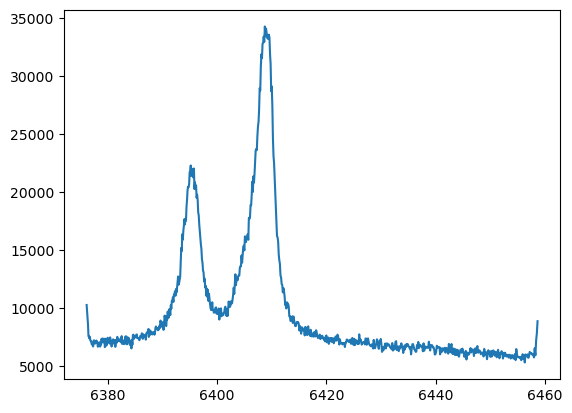

In [2]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1015522',lcls_run=22)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
keys=['ipm_dg2/sum'] 
names=['ipm']
xes.set_key_aliases(keys,names)
xes.hitfind=True
#xes.import_roi=[[0,-1]]
xes.rois=[[0,50]]
xes.add_filter('xray','ipm',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.pixels_to_patch=[382,383,384,385]#needed to change since detector is 90 degrees from standard. e.g. transposed above
xes.patch_mode='polynomial'
xes.run_parser(['77-80'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1')
v.make_energy_axis(A=43.25, R=250,  mm_per_pixel=0.05, d=0.981)
plt.plot(v.energy,v.summed_xes)
xes.aggregate_statistics()

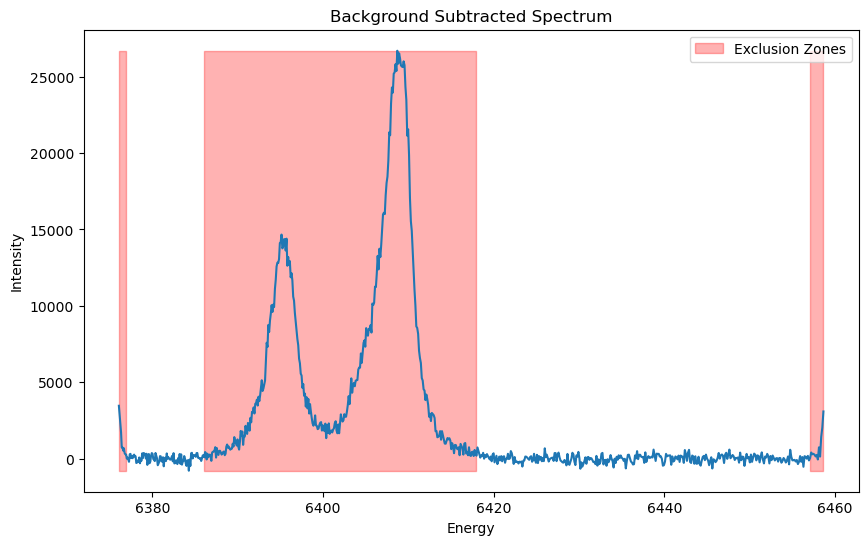

In [3]:
xes.first_moment=Peaks.first_moment(v.energy,v.summed_xes,6402,6415)
xes.fwhm=Peaks.gaussian_fwhm(v.energy,v.summed_xes,6402,6415)
exclusions= (
    (6369, 6377), #edge of detector
    (6386,6418), #Main peaks
    (6457,6465),# other edge of detector
)
v.background_subtracted=Background.polynomial_subtraction(v.energy,v.summed_xes,4,exclusions)


plt.figure(figsize=(10, 6))
plt.plot(v.energy, v.background_subtracted, label='Background Subtracted')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.title('Background Subtracted Spectrum')

for (x_start, x_end) in exclusions:
    plt.fill_between(v.energy, min(v.background_subtracted) - 1, max(v.background_subtracted) + 1, 
                     where=((v.energy >= x_start) & (v.energy <= x_end)), color='red', alpha=0.3)


exclusion_patch = Patch(color='red', alpha=0.3, label='Exclusion Zones')
plt.legend(handles=[exclusion_patch], loc='upper right')
plt.show()


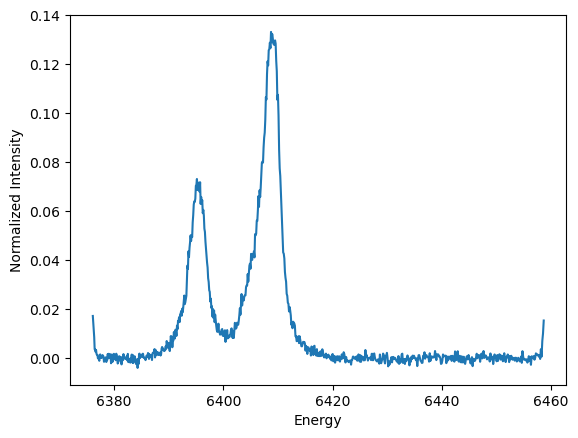

In [4]:
v.normalize_spectrum(6386,6418)
plt.plot(v.energy,v.normalized)
plt.xlabel('Energy')
plt.ylabel('Normalized Intensity')
with open(f'data_{str(xes.runs)}.pkl', 'wb') as f:
    pickle.dump(xes, f)
with open(f'analysis_{str(xes.runs)}.pkl', 'wb') as f:
    pickle.dump(v, f)

In [5]:
print(f'First Moment: {xes.first_moment}')
print(f'FWHM: {xes.fwhm}')
xes.print_run_statistics()

First Moment: 6408.254736908326
FWHM: 7.844355412680206
Run Number: 77
  Total: 8991
  X-ray Total: 8991
  Laser Total: 4498
  XES_Hits: 7111
  Percent_XES_Hits: 79.09%

Run Number: 78
  Total: 8999
  X-ray Total: 8987
  Laser Total: 4493
  XES_Hits: 5564
  Percent_XES_Hits: 61.83%

Run Number: 79
  Total: 8992
  X-ray Total: 8992
  Laser Total: 4494
  XES_Hits: 7210
  Percent_XES_Hits: 80.18%

Run Number: 80
  Total: 8992
  X-ray Total: 8992
  Laser Total: 4498
  XES_Hits: 7441
  Percent_XES_Hits: 82.75%



In [ ]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1015522',lcls_run=22)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
keys=['ipm_dg2/sum'] 
names=['ipm']
xes.set_key_aliases(keys,names)
xes.hitfind=True
#xes.import_roi=[[0,-1]]
xes.rois=[[95,110]]
xes.add_filter('xray','ipm',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.pixels_to_patch=[382,383,384,385]#needed to change since detector is 90 degrees from standard. e.g. transposed above
xes.patch_mode='polynomial'
xes.run_parser(['77-80'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1')
v.make_energy_axis(A=43.25, R=250,  mm_per_pixel=0.05, d=0.895)
plt.plot(v.energy,v.summed_xes)
xes.aggregate_statistics()

Processing:  30%|███       | 6/20 [00:03<00:07,  1.98Shot_Batch/s]

In [ ]:
xes.first_moment=Peaks.first_moment(v.energy,v.summed_xes,7030,7072)
xes.fwhm=Peaks.gaussian_fwhm(v.energy,v.summed_xes,7030,7072)
exclusions= (
    (6980, 6990), #edge of detector
    (7030,7070), #Main peaks
    (7076,7081),# other edge of detector
)
v.background_subtracted=Background.polynomial_subtraction(v.energy,v.summed_xes,4,exclusions)


plt.figure(figsize=(10, 6))
plt.plot(v.energy, v.background_subtracted, label='Background Subtracted')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.title('Background Subtracted Spectrum')

for (x_start, x_end) in exclusions:
    plt.fill_between(v.energy, min(v.background_subtracted) - 1, max(v.background_subtracted) + 1, 
                     where=((v.energy >= x_start) & (v.energy <= x_end)), color='red', alpha=0.3)


exclusion_patch = Patch(color='red', alpha=0.3, label='Exclusion Zones')
plt.legend(handles=[exclusion_patch], loc='upper right')
plt.show()
with open(f'data_kb__{str(xes.runs)}.pkl', 'wb') as f:
    pickle.dump(xes, f)
with open(f'analysis_kb_{str(xes.runs)}.pkl', 'wb') as f:
    pickle.dump(v, f)

In [ ]:
v.normalize_spectrum(7030,7070)
plt.plot(v.energy,v.normalized)
plt.xlabel('Energy')
plt.ylabel('Normalized Intensity')
with open(f'data_{str(xes.runs)}.pkl', 'wb') as f:
    pickle.dump(xes, f)
with open(f'analysis_{str(xes.runs)}.pkl', 'wb') as f:
    pickle.dump(v, f)

In [ ]:
print(f'First Moment: {xes.first_moment}')
print(f'FWHM: {xes.fwhm}')
xes.print_run_statistics()